[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/carlos-adir/UnB-Courses/blob/main/vibracoes/forcamento-harmonico.ipynb)

In [1]:
import numpy as np
import sympy as sp
try:
    from scipy.integrate import odeint
except ModuleNotFoundError:
    import os
    os.system("pip install scipy")
    from scipy.integrate import odeint
try:
    from matplolib import pyplot as plt
except ModuleNotFoundError:
    import os
    os.system("pip install matplotlib")
    from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter

## O problema

Este problema é a continuação da análise de um problema de dinâmica de corpo rigido

* De massa $m$ que é ligada a
* uma mola de constante $k$ 
* e a um amortecedor $c$

![sistema massa mola amortecedor](https://raw.githubusercontent.com/carlos-adir/UnB-Courses/main/vibracoes/img/model-mck.png)

A equação é então regida por

$$
m\ddot{x} + c\dot{x} + kx = f
$$

Em [outro notebook](https://github.com/carlos-adir/UnB-Courses/blob/main/vibracoes/sistema-massa-mola.ipynb) já tratamos o caso de oscilação livre, quando o termo $f$ é nulo. Neste, iremos dizer que o forçamento $f$ é um forçamento harmônico

$$
f = f_0 \cdot \cos \left(\omega t - \phi\right)
$$

De modo similar, teremos as condições iniciais

* Posição inicial $x(0) = x_0$
* Velocidade inicial $\dot{x}(0) = v_0$

## Caso 1: Vibração subamortecida $0 < \xi < 1$

#### Solução analítica

Temos a equação dada por

$$
m \cdot \ddot{x} + c \cdot \dot{x} + k \cdot x = f_0 \cdot \cos \left(\omega t - \phi\right)
$$

Em que às vezes usaremos os valores equivalentes

$$
\omega_{n} = \sqrt{\dfrac{k}{m}} \ \ \ \ \ \ \ \ \ 2\xi = \dfrac{c}{\sqrt{km}} \ \ \ \ \ \ \ \ \ \mu = \sqrt{1-\xi^2}
$$

Ou de forma complexa

$$
m\ddot{x} + c \dot{x} + k \cdot x = f_{0}\exp i \left(\omega t + \phi\right)
$$

A solução da EDO pode ser feita utilizando a transformada de Laplace dada por

$$
L\left(f\right) = \int_{0}^{\infty} f(t) \cdot \exp\left(-st\right) dt
$$

$$
ms^2 X + cs X + kX - \left[mv_0 + (ms+c)x_0\right]= f_0 \cdot \dfrac{\exp \left(i\phi\right)}{s - i\omega}
$$

Isolando $X$ obtemos

$$
X = \dfrac{1}{ms^2+cs+k} \cdot \left[mv_0 + (ms+c)x_0 + \dfrac{f_0 \exp \left(i\phi\right)}{s-i\omega}\right]
$$


Assumindo que $m$, $c$ e $k$ satisfazem um sistema subamortecido ($0 \le \xi < 1$) e pegando a tabela de transformadas, teremos

$$
L^{-1}\left(\dfrac{s+a}{(s+a)^2+b^2}\right) = \exp \left(-a t\right) \cos \left(bt\right)
$$
$$
L^{-1}\left(\dfrac{b}{(s+a)^2+b^2}\right) = \exp \left(-a t\right) \sin \left(bt\right)
$$
$$
L^{-1}\left(\dfrac{1}{ms^2 + cs + k}\right) = \dfrac{1}{\mu \sqrt{km}}\exp \left(-\xi \omega_{n} t\right) \sin \left(\mu \omega_{n} t\right)
$$
$$
L^{-1}\left(\dfrac{ms}{ms^2 + cs + k}\right) = \exp \left(-\xi \omega_{n} t\right) \left[ \cos \left(\mu \omega_{n} t\right) - \dfrac{\xi}{\mu} \sin \left(\mu \omega_{n} t\right)\right]
$$
$$
\dfrac{1}{s-i\omega}\cdot \dfrac{1}{ms^2 + cs + k} = \dfrac{1}{k-m\omega^2 + ic\omega} \left[\dfrac{1}{s-i\omega}- \dfrac{ms+c + im\omega}{ms^2 + cs + k}\right]
$$


Então fazendo a transformada inversa de $X$ teremos

$$
x_{homo}(t) =  \exp\left(-\xi \omega_n t\right) \left[ x_0 \cos \left(\mu \omega_{n} t\right) + \left(\dfrac{1 }{\mu \omega_{n}} v_0+ \dfrac{\xi}{\mu}x_0 \right) \sin\left(\mu \omega_{n} t\right)  \right]
$$
$$
x_{tran}(t) = \dfrac{-f_0 \exp\left(i\phi\right)}{k-m\omega^2 + ic\omega}  \exp \left(-\xi \omega_{n} t\right) \left[ \cos \left(\mu \omega_{n} t\right) + \left( \dfrac{i\omega}{\mu \omega_{n}}  + \dfrac{\xi}{\mu} \right) \sin \left(\mu \omega_{n} t\right) \right]
$$
$$
x_{perm}(t) = \dfrac{f_0 \exp\left(i\phi\right)}{k-m\omega^2 + ic\omega} \exp \left(i \omega t\right) 
$$

$$
\boxed{ x(t) = x_{homo}(t) + x_{tran}(t) + x_{perm}(t)}
$$



In [2]:
# The system
k = 7.2  # N/m
xi = 0.1  # Suposicao
m = 5  # kg
c = 2*xi*np.sqrt(k*m)  # N*s/m
wn = np.sqrt(k/m)
mu = np.sqrt(1-xi**2)
print("Mass-spring-damper parameters")
print("     m = %.3f" % m)
print("     c = %.3f" % c)
print("     k = %.3f" % k)
print("    wn = %.3f" % wn)
print("    xi = %.3f" % xi)
print("    mu = %.3f" % mu)

Mass-spring-damper parameters
     m = 5.000
     c = 1.200
     k = 7.200
    wn = 1.200
    xi = 0.100
    mu = 0.995


In [3]:
# The initial conditions
x0 = 0.001
v0 = 0.001
A = x0
B = (xi/mu)*x0 + v0/(mu*wn)
the = np.arctan2(A, B)
print("Initial conditions")
print("    x0 = %.3f" % x0)
print("    v0 = %.3f" % v0)
print("     A = %.3f" % A)
print("     B = %.3f" % B)
print("   the = %.3f" % the)

Initial conditions
    x0 = 0.001
    v0 = 0.001
     A = 0.001
     B = 0.001
   the = 0.817


In [4]:
# The force
f0 = 1
w = 5
phi = np.pi/4
# phi = 0
print("Force ")
print("    f0 = %.3f" % f0)
print("     w = %.3f" % w)
print("   phi = %.3f" % phi)

Force 
    f0 = 1.000
     w = 5.000
   phi = 0.785


Mostrando a solucao analitica

In [5]:
def solution_homogenea(m: float, c: float, k: float, x0: float, v0: float, t):
    xi = c/(2*np.sqrt(k*m))
    if xi < 0 or xi >= 1:
        raise ValueError("The equations are valid only for 0 <= xi < 1. Received %.2f" % xi)
    wn = np.sqrt(k/m)
    xi = c/(2*np.sqrt(k*m))
    if isinstance(t, sp.Symbol):
        i, exp, sin, cos = sp.I, sp.exp, sp.sin, sp.cos
    else:
        i, exp, sin, cos = 1j, np.exp, np.sin, np.cos
    xhomo = exp(-xi*wn*t)
    xhomo *= x0*cos(mu*wn*t) + (xi*x0/mu + v0/(mu*wn))*sin(mu*wn*t)
    return xhomo

def solution_transiente(m: float, c: float, k: float, f0: float, w: float, phi: float, t):
    xi = c/(2*np.sqrt(k*m))
    if xi < 0 or xi >= 1:
        raise ValueError("The equations are valid only for 0 <= xi < 1. Received %.2f" % xi)
    if isinstance(t, sp.Symbol):
        i, exp, sin, cos = sp.I, sp.exp, sp.sin, sp.cos
    else:
        i, exp, sin, cos = 1j, np.exp, np.sin, np.cos
    wn = np.sqrt(k/m)
    xi = c/(2*np.sqrt(k*m))
    mu = np.sqrt(1-xi**2)
    denom = k - m*w**2 + c*w*i
    xforc = -f0*exp(i*phi)*exp(-xi*wn*t)/denom
    xforc *= cos(mu*wn*t) + (xi/mu + i*w/(mu*wn))*sin(mu*wn*t)
    return xforc

def solution_permanente(m: float, c: float, k: float, f0: float, w: float, phi: float, t):
    xi = c/(2*np.sqrt(k*m))
    if xi < 0 or xi >= 1:
        raise ValueError("The equations are valid only for 0 <= xi < 1. Received %.2f" % xi)
    if isinstance(t, sp.Symbol):
        i, exp, sin, cos = sp.I, sp.exp, sp.sin, sp.cos
    else:
        i, exp, sin, cos = 1j, np.exp, np.sin, np.cos
    denom = k - m*w**2 + c*w*i
    xinfi = f0*exp(i*w*t+i*phi)/denom
    return xinfi

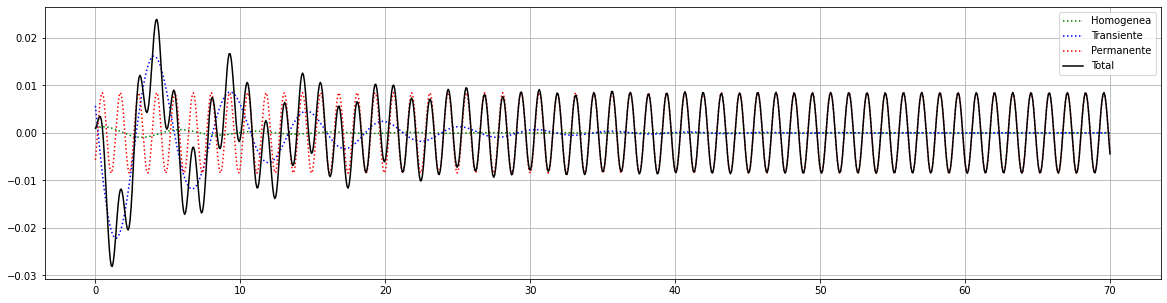

In [6]:
Ttotal = 70
tana = np.linspace(0, Ttotal, 1024+1)
xhomo = np.real(solution_homogenea(m, c, k, x0, v0, tana))
xtran = np.real(solution_transiente(m, c, k, f0, w, phi, tana))
xperm = np.real(solution_permanente(m, c, k, f0, w, phi, tana))
xtota = xhomo + xtran + xperm

plt.figure(figsize=(20, 5))
plt.plot(tana, xhomo, color="g", ls="dotted", label="Homogenea")
plt.plot(tana, xtran, color="b", ls="dotted", label="Transiente")
plt.plot(tana, xperm, color="r", ls="dotted", label="Permanente")
plt.plot(tana, xtota, color="k", label="Total")
plt.legend()
plt.grid()

#### Solução Numérica usando método de integração

In [7]:
MAT = np.array([[0, 1],
              [-k/m, -c/m]])
VEC = np.zeros(2)
def dydt(y, t):
    VEC[1] = f0*np.cos(w*t + phi)/m
    return MAT @ y + VEC
npts = 1025
t = np.linspace(0, Ttotal, npts)
y0 = [x0, v0]
Ynum = odeint(dydt, y0, t)

Text(0, 0.5, 'Deslocamento $m$')

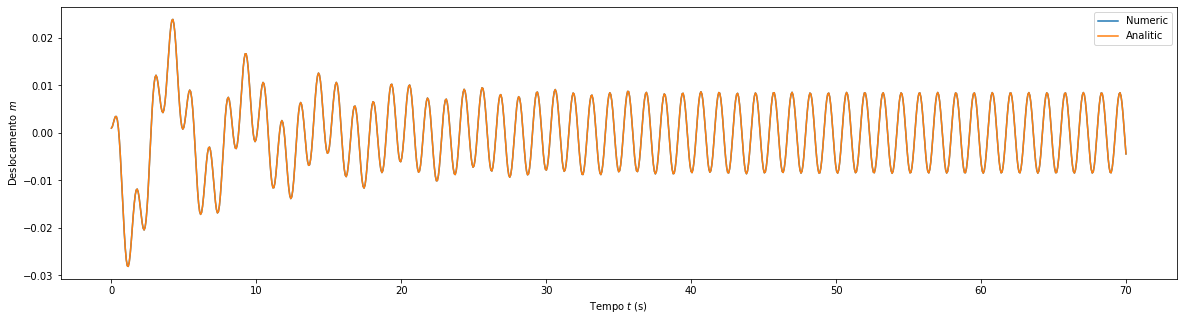

In [8]:
plt.figure(figsize=(20, 5))
plt.plot(t, Ynum[:, 0], label="Numeric")
plt.plot(tana, xtota, label="Analitic")
plt.legend()
plt.xlabel(r"Tempo $t$ (s)")
plt.ylabel(r"Deslocamento $m$")

## Caso 2: Análise de frequência

Como vimos anteriormente, a resposta de $x(t)$ dependia de 3 componentes: $x_{homo}$, $x_{tran}$ e $x_{perm}$.

No regime permanente (quando $t \to \infty$) a função se comporta apenas como $x_{infi}$ dado pela expressão

$$
x_{infi}(t) = \dfrac{f_0 \exp\left(i\phi\right)}{k-m\omega^2 + ic\omega} \exp \left(i \omega t\right) 
$$

Então definimos a quantidade $G(\omega)$ tal que $x_{infi}(t) = G(\omega) \cdot \dfrac{1}{k}f(t)$

$$
G(\omega) = \dfrac{k}{k-m\omega^2+ic\omega} = \dfrac{1}{1-r^2+2i\xi r} = \dfrac{1-r^2-2i\xi r}{\left(1-r^2\right)^2 + 4\xi^2 r^2}
$$

In [9]:
def G(m: float, c: float, k: float, w: float):
    return k/(k-m*w**2+1j*c*w)

Nessa função temos o ganho e a fase definidas por

$$
gain(\omega) = \left|G(\omega)\right| = \dfrac{1}{\sqrt{\left[1-\left(\frac{\omega}{\omega_{n}}\right)^2\right]^2+4\xi^2\left(\frac{\omega}{\omega_{n}}\right)^2}}
$$

$$
\varphi(\omega) = \arg G(\omega) \in \left(-\pi, \ \pi\right]
$$

No limite de $\omega \to 0$ temos que $\varphi \to 0^{-}$ enquanto no limite de $\omega \to \infty$ temos $\varphi \to -\pi$ e desta forma em termos das componentes principais teremos

$$
\varphi(\omega) = \dfrac{-\pi}{2} - \arctan \dfrac{\Re(G)}{\Im(G)} = \dfrac{-\pi}{2} - \arctan \dfrac{r^2-1}{2\xi r}
$$



In [10]:
def gain(G):
    return np.abs(G)

def varphi(G):
    return np.angle(G)

Agora plotamos os gráficos do ganho e da fase para diferentes valores de $\omega$

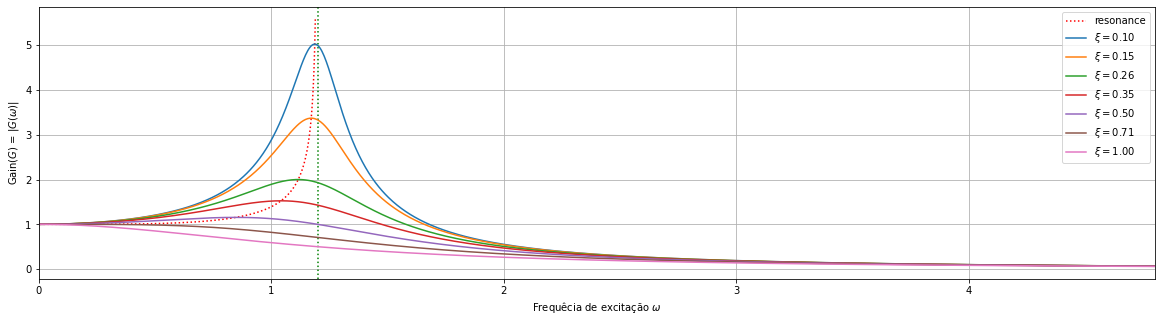

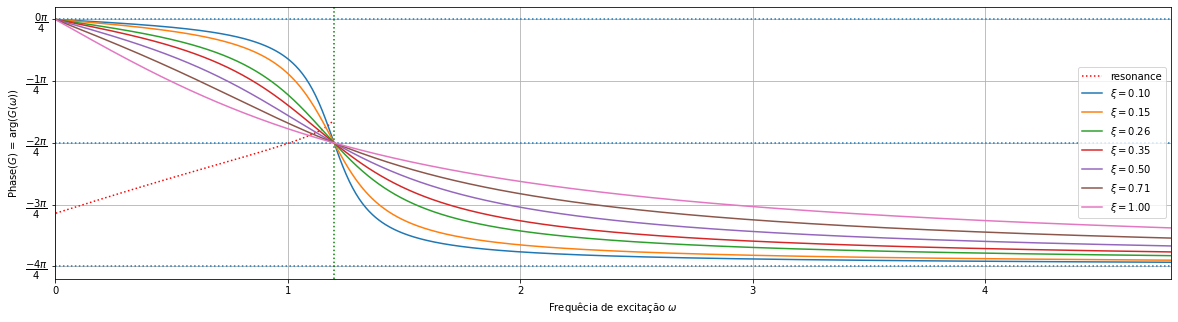

In [11]:
rvals = np.linspace(0, 4, 1024+1)
wvals = wn * rvals
xis = [0.1, 0.15, 0.2588, 0.35, 0.5, 1/np.sqrt(2), 1]
cvals = [2*xi*np.sqrt(k*m) for xi in xis]
xivals = np.linspace(0.09,1/np.sqrt(2)-1e-6,1024+1)
gainsres = 1/(2*xivals*np.sqrt(1-xivals**2))
freqsres = wn*np.sqrt(1-2*xivals**2)
phaseres = -0.5*np.pi - np.arctan2(xivals, np.sqrt(1-2*xivals**2))

plt.figure(figsize=(20, 5))
plt.xlabel(r"Frequêcia de excitação $\omega$")
plt.ylabel(r"Gain($G$) = $\|G(\omega)\|$")
plt.axvline(x=wn, ls="dotted", color="g")
plt.plot(freqsres, gainsres, ls="dotted", color="r", label="resonance")
plt.xlim(min(wvals), max(wvals))
for xi, c in zip(xis, cvals):
    gains = gain(G(m, c, k, wvals))
    plt.plot(wvals, gains, label=r"$\xi=%.2f$"%xi)
plt.legend()
plt.grid()

plt.figure(figsize=(20, 5))
plt.axhline(0, ls="dotted")
plt.axhline(-2, ls="dotted")
plt.axhline(-4, ls="dotted")
plt.axvline(wn, ls="dotted", color="g")
plt.xlabel(r"Frequêcia de excitação $\omega$")
plt.ylabel(r"Phase($G$) = arg$\left(G(\omega)\right)$")
plt.plot(freqsres, phaseres, ls="dotted", color="r", label="resonance")
plt.xlim(min(wvals), max(wvals))
ax = plt.gca()
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_formatter(FormatStrFormatter(r"$\dfrac{%g\pi}{4}$"))
for xi, c in zip(xis, cvals):
    phases = varphi(G(m, c, k, wvals))
    plt.plot(wvals, phases*(4/np.pi), label=r"$\xi=%.2f$"%xi)
plt.legend()
plt.grid()

O primeiro fator que observamos é sobre o máximo do ganho, que é dado quando

$$
\left[\dfrac{d \left|G(\omega)\right|}{d\omega}\right]_{\omega = \omega_{r}} = 0 \Rightarrow 2\left(\frac{\omega_r}{\omega_{n}}\right)\left[1-\left(\frac{\omega_r}{\omega_{n}}\right)^2+2\xi^2\right] \Rightarrow \omega_{r} = \omega_{n} \sqrt{1-2\xi^2}
$$

Notemos que para $\xi > \dfrac{1}{\sqrt{2}}$, o valor de $\omega_{r}$ se torna imaginário (isto é, não há pico) e então não iremos considerar valores altos de $\xi$
O ganho para $\omega_{r}$ valor é

$$
G_r = \left|G(\omega_{r})\right| = \dfrac{1}{2\xi \sqrt{1-\xi^2}}
$$

Agora, seja $\omega_{t}$ tal que 

$$
\left|G(\omega_{t})\right| = G_t \in \left(0, G_r\right)
$$

Fazendo as contas teremos

$$
\left(\dfrac{\omega_t}{\omega_{n}}\right)^2 = 1-2\xi^2 \pm \sqrt{\dfrac{1}{G_t^2}-4\xi^2 + 4\xi^4}
$$

Gera duas restrições para que $\omega_{t} \in \mathbb{R}^{+}$ dadas por

$$
\dfrac{1}{G_t^2} -4\xi^2+4\xi^4 > 0 \Rightarrow G_t < \dfrac{1}{2\xi \sqrt{1-\xi^2}}
$$
$$
\left(\dfrac{\omega_t}{\omega_{n}}\right)^2 > 0 \Rightarrow 
\begin{cases}
G_t < 1  \ \ \ \ \ \ \ \text{one root} \\
G_t > 1  \ \ \ \ \ \ \ \text{two roots}
\end{cases}
$$

Para utilizarmos a banda, então teremos que $1 < G_t < G_r$ de modo que podemos criar um parâmetro $\alpha \in \left(0, \ 1\right)$ referente à altura da banda

* $\alpha = 0$ temos a base da banda
* $\alpha = 1$ temos o ponto máximo da curva

Desta forma, reescrevemos 

$$
G_{\alpha} = \left|G(\omega_{\alpha})\right| = (1-\alpha) + \alpha \cdot G_r
$$

$$
r_\alpha^2 = \left(\dfrac{\omega_{\alpha}}{\omega_n}\right)^{2} = 
1-2\xi^2 \pm \sqrt{\dfrac{1}{G_\alpha^2}-4\xi^2 + 4\xi^4}
$$

E obtemos a largura de banda dada pela expressão

$$
\dfrac{\Delta \omega_\alpha}{\omega_{n}} = \sqrt{1-2\xi^2 + \sqrt{\dfrac{1}{G_\alpha^2}-4\xi^2 + 4\xi^4}} - \sqrt{1-2\xi^2 - \sqrt{\dfrac{1}{G_\alpha^2}-4\xi^2 + 4\xi^4}}
$$

$$
\dfrac{\Delta \omega_\alpha}{\omega_{n}} = \sqrt{2-4\xi^2 -2\sqrt{1-\dfrac{1}{G_\alpha^2}}}
$$

![Largura de Banda](https://raw.githubusercontent.com/carlos-adir/UnB-Courses/main/vibracoes/img/LarguraDeBanda.png)

C:\Users\Carlos\AppData\Local\Temp\ipykernel_8700\623753763.py:10: RuntimeWarning: invalid value encountered in sqrt
  largura = np.sqrt(2-4*xis**2 - 2*np.sqrt(Ga**2-1)/Ga)


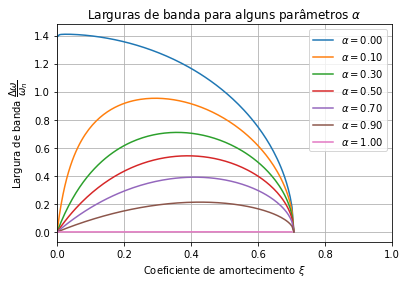

In [12]:
alphas = [1e-6, 0.1, 0.3, 0.5, 0.7, 0.9, 1-1e-6]
xis = np.linspace(1e-3, 1/np.sqrt(2)-1e-6, 129)
Gr = 1/(2*xis*np.sqrt(1-xis**2))
plt.xlim(0, 1.0)
plt.xlabel(r"Coeficiente de amortecimento $\xi$")
plt.ylabel(r"Largura de banda $\dfrac{\Delta \omega}{\omega_{n}}$")
plt.title(r"Larguras de banda para alguns parâmetros $\alpha$")
for alpha in alphas:
    Ga = 1+alpha*(Gr-1)
    largura = np.sqrt(2-4*xis**2 - 2*np.sqrt(Ga**2-1)/Ga)
    plt.plot(xis, largura, label=r"$\alpha = %.2f$" % alpha)
plt.legend()
plt.grid()

Como podemos ver, não obtemos funções de modo que seja possível encontrar um valor apenas de $\xi$ sabendo-se a largura de banda.

Isolando então o valor de $\xi$ da equação da largura obtemos a função de duas variáveis

$$
\xi\left(\Delta \omega, \ G_\alpha\right) = \dfrac{1}{2} \sqrt{2-\left(\dfrac{\Delta \omega}{\omega_{n}}\right)^2 - 2\sqrt{1-\dfrac{1}{G_\alpha^2}}}
$$

As curvas de nível dessa função é dada então por

C:\Users\Carlos\AppData\Local\Temp\ipykernel_8700\1535862650.py:8: RuntimeWarning: invalid value encountered in sqrt
  xi = np.sqrt(2-larguras**2-2*np.sqrt(1-1/Gv**2))/2


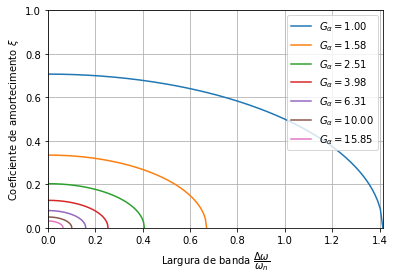

In [13]:
Gvals = np.logspace(0, 1.2, 7)
plt.xlim(0, np.sqrt(2))
plt.ylim(0, 1)
plt.xlabel(r"Largura de banda $\dfrac{\Delta \omega}{\omega_{n}}$")
plt.ylabel(r"Coeficiente de amortecimento $\xi$")
for Gv in Gvals:
    larguras = np.linspace(0, np.sqrt(2-2*np.sqrt(1-1/Gv**2)), 129)
    xi = np.sqrt(2-larguras**2-2*np.sqrt(1-1/Gv**2))/2
    xi[-1] = 0
    plt.plot(larguras, xi, label=r"$G_{\alpha} = %.2f$" % Gv)
plt.legend()
plt.grid()

## Caso 3: Sistema não dissipativo

Para o caso três, podemos pegar todas as equações mostradas acima colocando o valor de $\xi$ igual a zero para obtermos

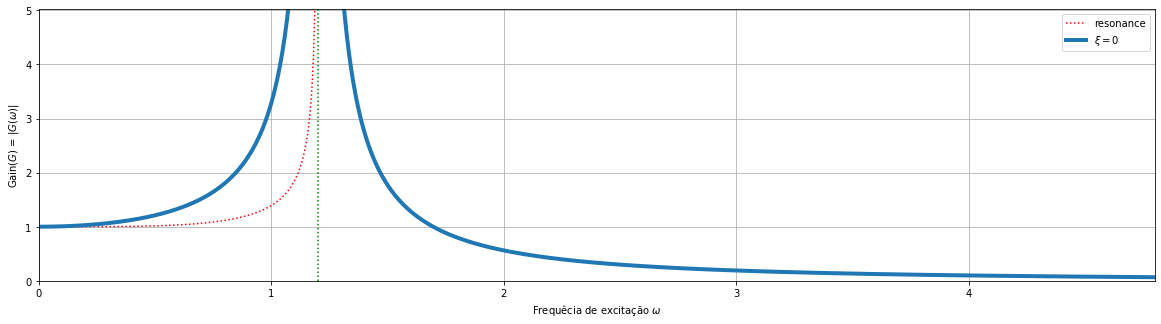

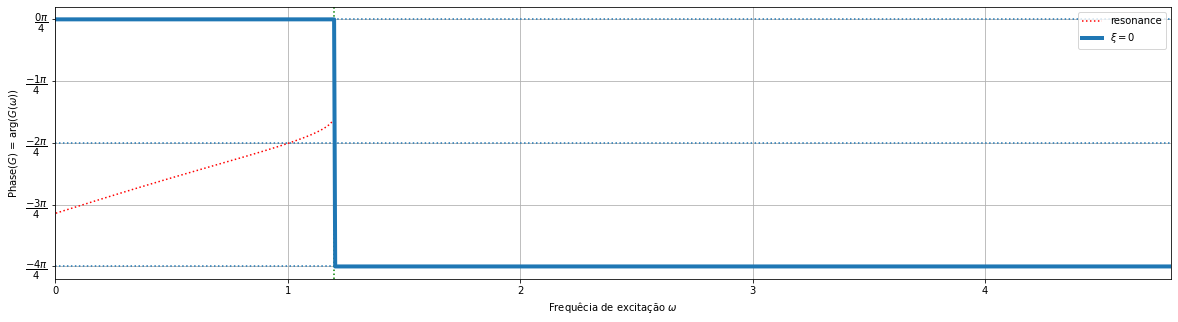

In [14]:
xivals = np.linspace(0.09,1/np.sqrt(2)-1e-6,1024+1)
gainsmax = 1/(2*xivals*np.sqrt(1-xivals**2))
freqsmax = wn*np.sqrt(1-2*xivals**2)
phaseres = -0.5*np.pi-np.arctan(xivals/np.sqrt(1-2*xivals**2))

plt.figure(figsize=(20, 5))
plt.xlabel(r"Frequêcia de excitação $\omega$")
plt.ylabel(r"Gain($G$) = $\|G(\omega)\|$")
plt.axvline(x=wn, ls="dotted", color="g")
plt.xlim(min(wvals), max(wvals))
plt.ylim(ymax=1/(2*0.1*np.sqrt(1-0.1**2)))
gains = gain(G(m, 0, k, wvals))
plt.plot(freqsmax, gainsmax, ls="dotted", color="r", label="resonance")
plt.plot(wvals, gains, label=r"$\xi=0$", linewidth=4)
plt.legend()
plt.grid()

plt.figure(figsize=(20, 5))
plt.axhline(0, ls="dotted")
plt.axhline(-2, ls="dotted")
plt.axhline(-4, ls="dotted")
plt.axvline(wn, ls="dotted", color="g")
plt.plot(freqsres, phaseres, ls="dotted", color="r", label="resonance")
plt.xlabel(r"Frequêcia de excitação $\omega$")
plt.ylabel(r"Phase($G$) = arg$\left(G(\omega)\right)$")
plt.xlim(min(wvals), max(wvals))
ax = plt.gca()
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_formatter(FormatStrFormatter(r"$\dfrac{%g\pi}{4}$"))
phases = varphi(G(m, 0, k, wvals))
plt.plot(wvals, phases*(4/np.pi), label=r"$\xi=0$", linewidth=4)
plt.legend()
plt.grid()

Já a resposta temporal pode ser dada pela expressão

$$
x_{homo}(t) = x_0 \cos \left(\omega_{n} t\right) + \dfrac{v_0}{\omega_{n}} \sin\left(\omega_{n} t\right)
$$
$$
x_{tran}(t) = \dfrac{-f_0 \exp\left(i\phi\right)}{k-m\omega^2} \left[ \cos \left(\omega_{n} t\right) +  i\dfrac{\omega}{\omega_{n}} \sin \left(\omega_{n} t\right) \right]
$$
$$
x_{perm}(t) = \dfrac{f_0 \exp\left(i\phi\right)}{k-m\omega^2} \exp \left(i \omega t\right) 
$$

$$
\boxed{ x(t) = x_{homo}(t) + x_{tran}(t) + x_{perm}(t)}
$$


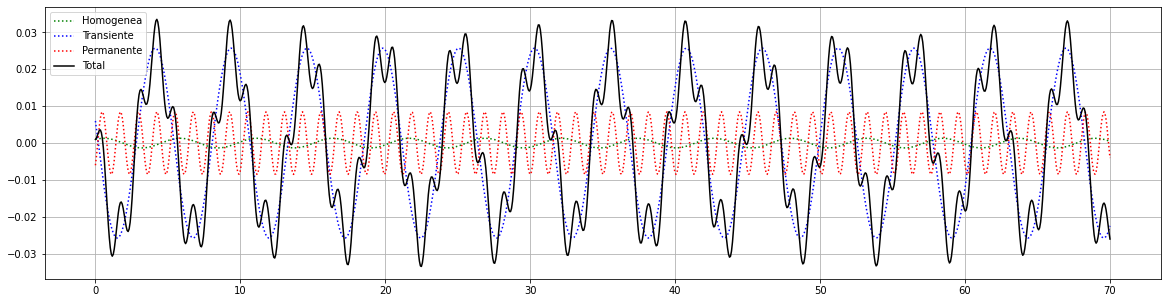

In [15]:
xhomo = np.real(solution_homogenea(m, 0, k, x0, v0, tana))
xtran = np.real(solution_transiente(m, 0, k, f0, w, phi, tana))
xperm = np.real(solution_permanente(m, 0, k, f0, w, phi, tana))
xtota = xhomo + xtran + xperm

plt.figure(figsize=(20, 5))
plt.plot(tana, xhomo, color="g", ls="dotted", label="Homogenea")
plt.plot(tana, xtran, color="b", ls="dotted", label="Transiente")
plt.plot(tana, xperm, color="r", ls="dotted", label="Permanente")
plt.plot(tana, xtota, color="k", label="Total")
plt.legend()
plt.grid()

E a solução numérica é dada por

In [16]:
MAT = np.array([[0, 1],
              [-k/m, 0]])
VEC = np.zeros(2)
def dydt(y, t):
    VEC[1] = f0*np.cos(w*t + phi)/m
    return MAT @ y + VEC
npts = 1025
t = np.linspace(0, Ttotal, npts)
y0 = [x0, v0]
Ynum = odeint(dydt, y0, t)

Text(0, 0.5, 'Deslocamento $m$')

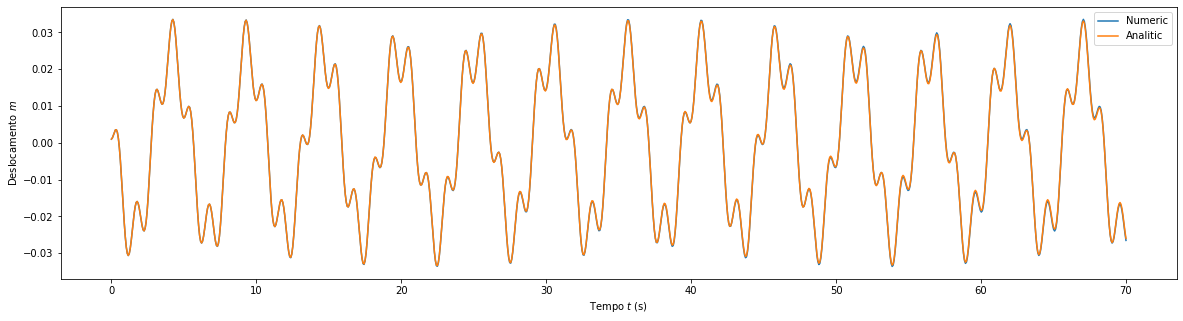

In [17]:
plt.figure(figsize=(20, 5))
plt.plot(t, Ynum[:, 0], label="Numeric")
plt.plot(tana, xtota, label="Analitic")
plt.legend()
plt.xlabel(r"Tempo $t$ (s)")
plt.ylabel(r"Deslocamento $m$")

## Caso 4

Para esse caso, temos a figura mostrado abaixo que mostra a máquina.

<img src="https://raw.githubusercontent.com/carlos-adir/UnB-Courses/main/vibracoes/img/washmachine.jpeg" data-canonical-src="https://raw.githubusercontent.com/carlos-adir/UnB-Courses/main/vibracoes/img/washmachine.jpeg" width="300" />

Seja $u$ a posição do bloco, teremos então que

$$
m\ddot{u} + c\dot{u} + ku = f(t)
$$

Podemos modelar o forçamento de modo

$$
f(t) = m_{a}d \omega^2 \cdot \cos \left(\omega t\right)
$$

Então de modo semelhante teremos uma decomposição de $u$ na parte transiente e na parte permanente.
A componente $u_{homo}$ permanece a mesma da modelagem anterior

$$
u_{homo}(t) =  \exp\left(-\xi \omega_n t\right) \left[ u_0 \cos \left(\mu \omega_{n} t\right) + \left(\dfrac{1 }{\mu \omega_{n}} v_0+ \dfrac{\xi}{\mu}u_0 \right) \sin\left(\mu \omega_{n} t\right)  \right]
$$

e então o termo intransiente é devido a transformada inversa de 

$$
u_{tran} + u_{perm} = L^{-1}\left(\dfrac{m_{a}d \omega^2}{ms^2+cs+k} \cdot \dfrac{s}{s^2+\omega^2}\right)
$$

$$
u_{tran}(t) = \dfrac{-m_a d \omega^2}{k-m\omega^2 + ic\omega}  \exp \left(-\xi \omega_{n} t\right) \left[ \cos \left(\mu \omega_{n} t\right) + \left( \dfrac{i\omega}{\mu \omega_{n}}  + \dfrac{\xi}{\mu} \right) \sin \left(\mu \omega_{n} t\right) \right]
$$
$$
u_{perm}(t) = \dfrac{m_a d \omega^2}{k-m\omega^2 + ic\omega} \cos \left(\omega t\right) 
$$

$$
\boxed{ u(t) = u_{homo}(t) + u_{tran}(t) + u_{perm}(t)}
$$


O ganho $G(\omega)$ da função $u_{perm}$ é dado por

$$
G(\omega) = \dfrac{m_ad\omega^2}{k-m\omega^2+ic\omega}
$$


In [18]:
def solution_transiente(m: float, c: float, k: float, ma: float, d: float, w: float, t):
    xi = c/(2*np.sqrt(k*m))
    if xi < 0 or xi >= 1:
        raise ValueError("The equations are valid only for 0 <= xi < 1. Received %.2f" % xi)
    if isinstance(t, sp.Symbol):
        i, exp, sin, cos = sp.I, sp.exp, sp.sin, sp.cos
    else:
        i, exp, sin, cos = 1j, np.exp, np.sin, np.cos
    wn = np.sqrt(k/m)
    mu = np.sqrt(1-xi**2)
    parte1 = (-ma*d*w**2)/(k-m*w**2+i*c*w)
    parte2 = cos(mu*wn*t) + (i*w/(mu*wn) + xi/mu)*sin(mu*wn*t)
    return parte1 * exp(-xi*wn*t) * parte2

def solution_permanente(m: float, c: float, k: float, ma: float, d: float, w: float, t):
    xi = c/(2*np.sqrt(k*m))
    if xi < 0 or xi >= 1:
        raise ValueError("The equations are valid only for 0 <= xi < 1. Received %.2f" % xi)
    if isinstance(t, sp.Symbol):
        i, cos = sp.I, sp.cos
    else:
        i, cos = 1j, np.cos
    return ma*d*(w**2)*cos(w*t)/(k-m*w**2+i*c*w)

In [19]:
ma = m/100
d = 0.1*m/k
xi = 0.1
c = 2*xi*np.sqrt(k*m)
uhomo = np.real(solution_homogenea(m, c, k, x0, v0, tana))
utran = np.real(solution_transiente(m, c, k, ma, d, w, tana))
uperm = np.real(solution_permanente(m, c, k, ma, d, w, tana))
utota = uhomo+utran+uperm

Cuja solução numérica é dada por

In [20]:
MAT = np.array([[0, 1],
              [-k/m, -c/m]])
VEC = np.zeros(2)
def dydt(y, t):
    VEC[1] = d*ma*w**2*np.cos(w*t)/m
    return MAT @ y + VEC
npts = 10251
t = np.linspace(0, Ttotal, npts)
y0 = [x0, v0]
Ynum = odeint(dydt, y0, t)

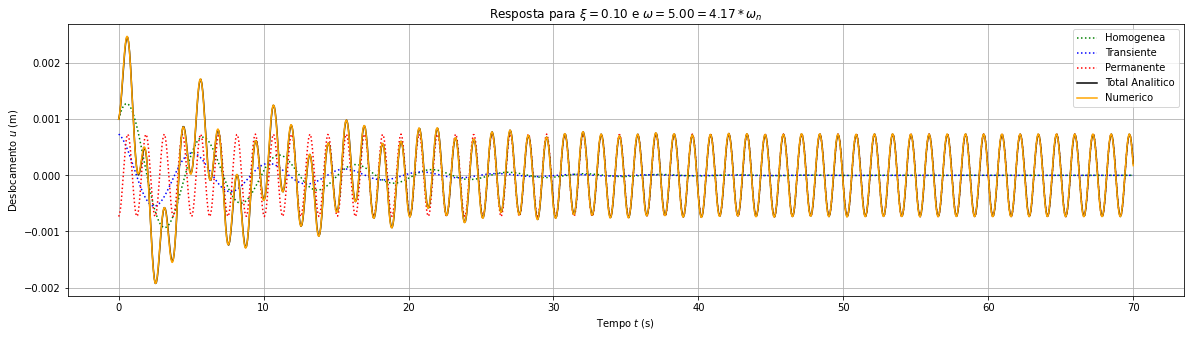

In [21]:
plt.figure(figsize=(20, 5))
plt.plot(tana, uhomo, color="g", ls="dotted", label="Homogenea")
plt.plot(tana, utran, color="b", ls="dotted", label="Transiente")
plt.plot(tana, uperm, color="r", ls="dotted", label="Permanente")
plt.plot(tana, utota, color="k", label="Total Analitico")
plt.plot(t, Ynum[:, 0], color="orange", label="Numerico")
plt.legend()
plt.title(r"Resposta para $\xi = %.2f$ e $\omega = %.2f = %.2f * \omega_n$" % (xi, w, w/wn))
plt.ylabel(r"Deslocamento $u$ (m)")
plt.xlabel(r"Tempo $t$ (s)")
plt.grid()

Agora plotamos para diferentes valores de amortecimento $\xi$ e de frequência de rotação $\omega$ 

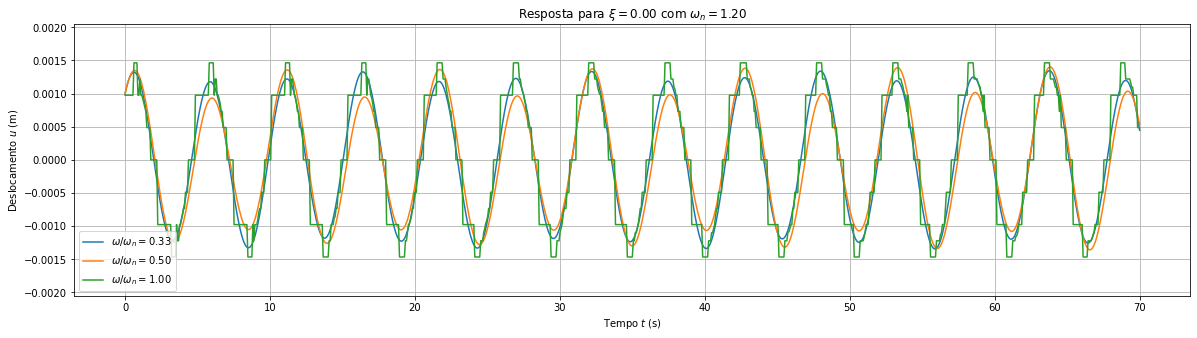

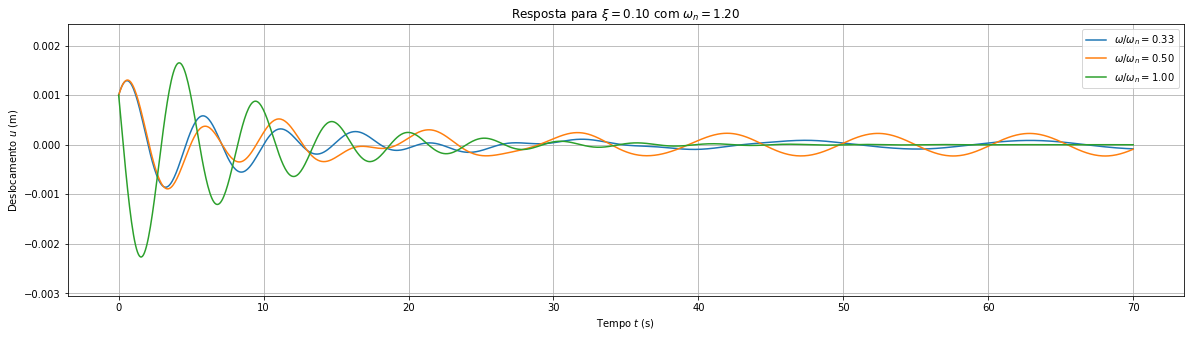

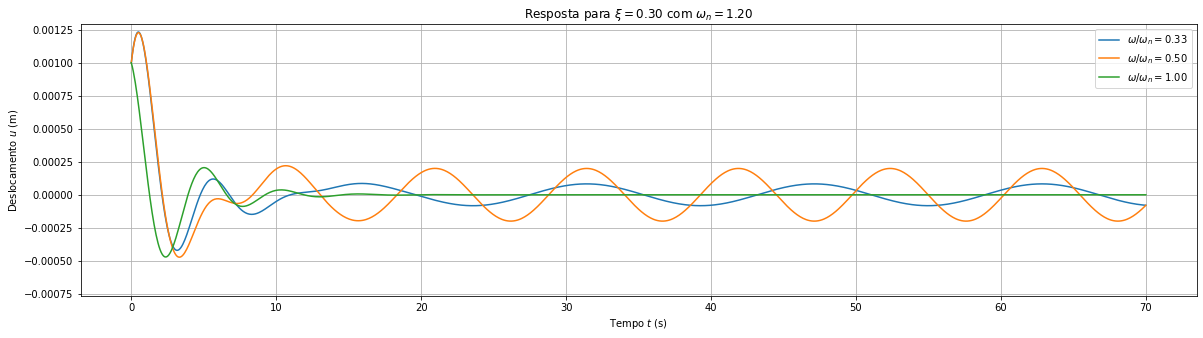

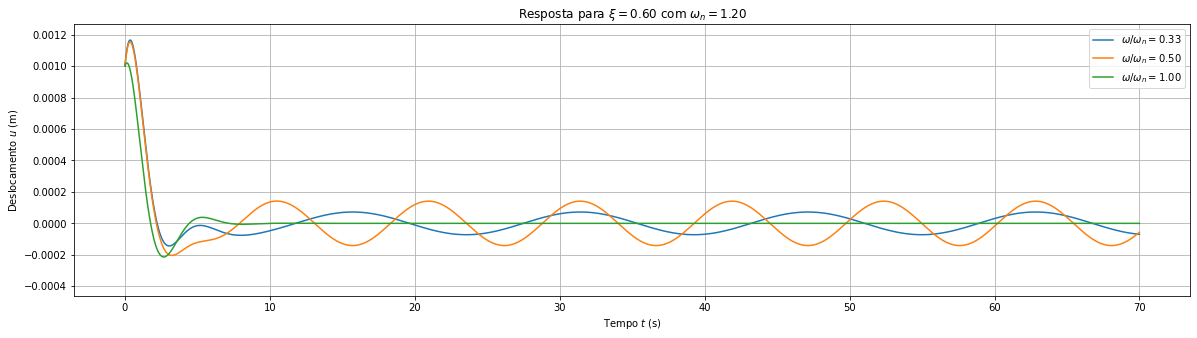

In [22]:
rtests = [1/3, 1/2, 1]
xitests = [0, 0.1, 0.3, 0.6]
for xi in xitests:
    c = 2*xi*np.sqrt(k*m)
    plt.figure(figsize=(20, 5))
    for r in rtests:
        w = r * wn
        xhomo = np.real(solution_homogenea(m, c, k, x0, v0, tana))
        xtran = np.real(solution_transiente(m, c, k, ma, d, w, tana))
        xperm = np.real(solution_permanente(m, c, k, ma, d, w, tana))
        xtota = xhomo+xtran+xperm
        plt.plot(tana, xtota, label=r"$\omega/\omega_{n} = %.2f$" % r)
    plt.legend()
    ymin, ymax = min(xtota), max(xtota)
    plt.ylim(1.2*ymin-0.2*ymax, 1.2*ymax-0.2*ymin)
    plt.title(r"Resposta para $\xi = %.2f$ com $\omega_{n} = %.2f$" % (xi, wn))
    plt.ylabel(r"Deslocamento $u$ (m)")
    plt.xlabel(r"Tempo $t$ (s)")
    plt.grid()

Vemos que para o caso não amortecido, isto é, quando $\xi = 0$ temos a função dada por

$$
u_{homo}(t) = u_0 \cos \left(\omega_{n} t\right) + \dfrac{v_0}{\omega_{n}} \sin\left(\omega_{n} t\right)
$$
$$
u_{tran}(t) = \dfrac{-m_a d \omega^2}{k-m\omega^2} \left[ \cos \left(\omega_{n} t\right) + \dfrac{i\omega}{\omega_{n}} \sin \left(\omega_{n} t\right) \right]
$$
$$
u_{perm}(t) = \dfrac{m_a d \omega^2}{k-m\omega^2} \cos \left(\omega t\right) 
$$

Que no caso quando a frequência $\omega$ for igual à frequência natural $\omega_{n}$ obtemos que $u_{tran}$ e $u_{perm}$ explodem, isto é, não é possível calcular a resposta. A primeira imagem que mostra sua resposta como degrais não está correta e se deve ao erro numérico. 

#### Agora fazemos a análise na frequência

In [23]:
def G(m: float, c: float, k: float, ma: float, d: float, w: float):
    return ma*d*w**2 / (k-(m+ma)*w**2+1j*c*w)

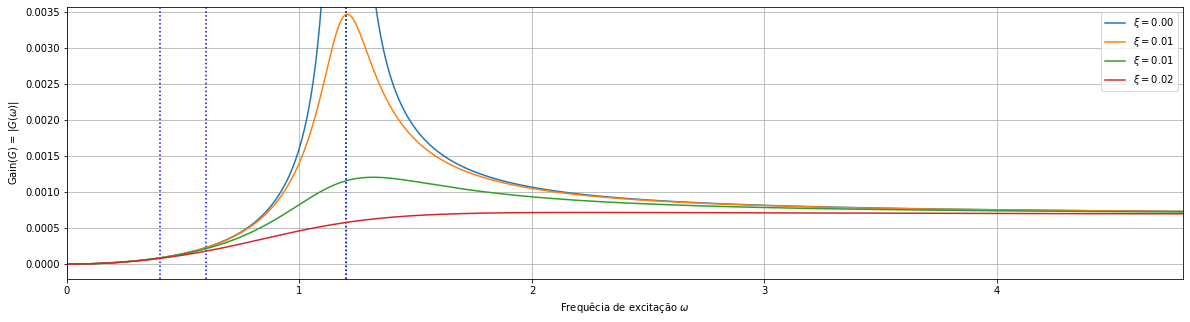

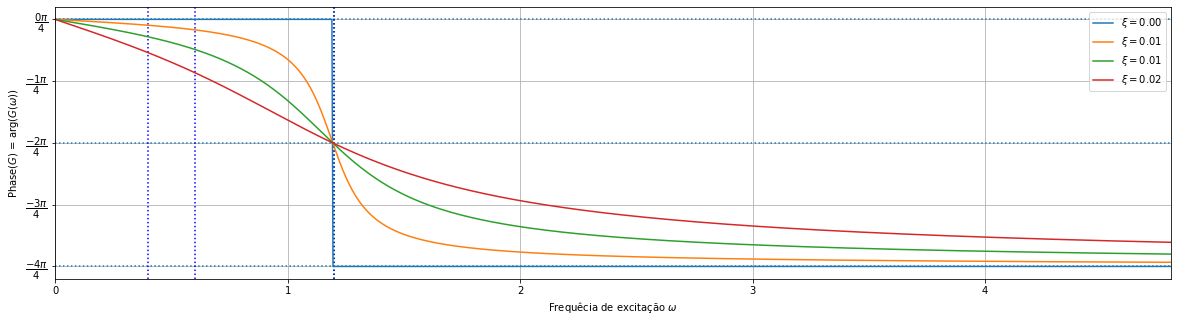

In [24]:
rvals = np.linspace(0, 4, 1024+1)
wvals = wn * rvals
cvals = [2*xi*np.sqrt(k*m) for xi in xitests]

plt.figure(figsize=(20, 5))
plt.xlabel(r"Frequêcia de excitação $\omega$")
plt.ylabel(r"Gain($G$) = $\|G(\omega)\|$")
plt.axvline(x=wn, ls="dotted", color="g")
for r in rtests:
    plt.axvline(x=wn*r, ls="dotted", color="b")
plt.xlim(min(wvals), max(wvals))
for xi, c in zip(xis, cvals):
    gains = gain(G(m, c, k, ma, d, wvals))
    if xi == xis[-1]:
        ymax = np.max(gains)
    plt.plot(wvals, gains, label=r"$\xi=%.2f$"%xi)
plt.ylim(-0.2*ymax, 3.5*ymax)
plt.legend()
plt.grid()

plt.figure(figsize=(20, 5))
plt.axhline(0, ls="dotted")
plt.axhline(-2, ls="dotted")
plt.axhline(-4, ls="dotted")
plt.axvline(wn, ls="dotted", color="g")
plt.xlabel(r"Frequêcia de excitação $\omega$")
plt.ylabel(r"Phase($G$) = arg$\left(G(\omega)\right)$")
for r in rtests:
    plt.axvline(x=wn*r, ls="dotted", color="b")
plt.xlim(min(wvals), max(wvals))
ax = plt.gca()
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_formatter(FormatStrFormatter(r"$\dfrac{%g\pi}{4}$"))
for xi, c in zip(xis, cvals):
    phases = varphi(G(m, c, k, ma, d, wvals))
    plt.plot(wvals, phases*(4/np.pi), label=r"$\xi=%.2f$"%xi)
plt.legend()
plt.grid()

Nas imagens acima colocamos as linhas verticais que são nas frequências que fizemos as análises acima. No caso temos de $\omega = \dfrac{1}{3}\omega_{n}$, $\omega = \dfrac{1}{2}\omega_n$ e $\omega = \omega_{n}$

## Disponível online

Esse python notebook está disponível online no GitHub através do link:

* [GitHub/carlos-adir/UnB-Courses/vibracoes/forcamento-harmonico](https://github.com/carlos-adir/UnB-Courses/blob/main/vibracoes/forcamento-harmonico.ipynb)